In [1]:
import torch
import pandas as pd
from torch.utils.data import DataLoader

from datasets import load_dataset, DatasetDict, Dataset
from transformers import T5Tokenizer, T5ForConditionalGeneration,  DataCollatorWithPadding

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

/home/uj-user/Yo/dolly-15k-analysis/dolly-venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-small")
model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-small", output_hidden_states=True)

In [12]:
dataset = load_dataset('HuggingFaceH4/databricks_dolly_15k')
#dataset = load_dataset('HuggingFaceH4/asss')
df = pd.DataFrame(dataset['train'])
dataset

Found cached dataset parquet (/home/uj-user/.cache/huggingface/datasets/HuggingFaceH4___parquet/HuggingFaceH4--databricks_dolly_15k-6252f3495e7d2b9d/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)
100%|██████████| 1/1 [00:00<00:00, 768.89it/s]


DatasetDict({
    train: Dataset({
        features: ['category', 'instruction', 'input', 'output'],
        num_rows: 15015
    })
})

In [15]:
load_dataset('cnn_dailymail', '3.0.0')

Found cached dataset cnn_dailymail (/home/uj-user/.cache/huggingface/datasets/cnn_dailymail/3.0.0/3.0.0/1b3c71476f6d152c31c1730e83ccb08bcf23e348233f4fcc11e182248e6bf7de)
100%|██████████| 3/3 [00:00<00:00, 353.21it/s]


DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 287113
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 13368
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11490
    })
})

In [4]:
df = df[df != ''].dropna()
df.reset_index(drop=True, inplace=True)
df

,category,instruction,input,output
0,closed_qa,When did Virgin Australia start operating?,"Virgin Australia, the trading name of Virgin A...",Virgin Australia commenced services on 31 Augu...
1,closed_qa,When was Tomoaki Komorida born?,Komorida was born in Kumamoto Prefecture on Ju...,"Tomoaki Komorida was born on July 10,1981."
2,information_extraction,If I have more pieces at the time of stalemate...,Stalemate is a situation in chess where the pl...,No. \nStalemate is a drawn position. It doesn'...
3,closed_qa,"Given a reference text about Lollapalooza, whe...",Lollapalooza /ˌlɒləpəˈluːzə/ (Lolla) is an ann...,Lollapalooze is an annual musical festival hel...
4,information_extraction,Who was John Moses Browning?,"John Moses Browning (January 23, 1855 – Novemb...",John Moses Browning is one of the most well-kn...
...,...,...,...,...
4593,information_extraction,When did Phil Knight announce he would step do...,"Throughout the 1980s, Nike expanded its produc...",Phil Knight announced he would step down in 20...
4594,closed_qa,What are common florals found in Zigalga Natio...,Zigalga National Park (Russian: Национальный п...,Zigalga National Park has the majority of its ...
4595,closed_qa,What is linux Bootloader,"A bootloader, also spelled as boot loader or c...",A bootloader is a program written in machine c...
4596,closed_qa,What is one-child policy?,The term one-child policy refers to a populati...,"The ""one-child policy"" was a Chinese populatio..."


In [5]:
df['category'].value_counts()

closed_qa                 1823
information_extraction    1512
summarization             1263
Name: category, dtype: int64

In [6]:
df = df[df['category'].str.contains('closed_qa')]
df.reset_index(drop=True, inplace=True)
df

,category,instruction,input,output
0,closed_qa,When did Virgin Australia start operating?,"Virgin Australia, the trading name of Virgin A...",Virgin Australia commenced services on 31 Augu...
1,closed_qa,When was Tomoaki Komorida born?,Komorida was born in Kumamoto Prefecture on Ju...,"Tomoaki Komorida was born on July 10,1981."
2,closed_qa,"Given a reference text about Lollapalooza, whe...",Lollapalooza /ˌlɒləpəˈluːzə/ (Lolla) is an ann...,Lollapalooze is an annual musical festival hel...
3,closed_qa,Who was Kyle Van Zyl playing against when he s...,Van Zyl joined the Eastern Province Kings Acad...,Kyle Van Zyl was playing against Boland U21 wh...
4,closed_qa,Who was the first to record the Needles and Pi...,"""Needles and Pins"" is a rock song credited to ...",The first artist to record Needles and Pins so...
...,...,...,...,...
1818,closed_qa,How many types of cat does the world cat feder...,"As of 2023, The International Cat Association ...",69
1819,closed_qa,What is the history of coffee?,The history of coffee dates back to centuries ...,Much of the early history of coffee was tied t...
1820,closed_qa,What are common florals found in Zigalga Natio...,Zigalga National Park (Russian: Национальный п...,Zigalga National Park has the majority of its ...
1821,closed_qa,What is linux Bootloader,"A bootloader, also spelled as boot loader or c...",A bootloader is a program written in machine c...


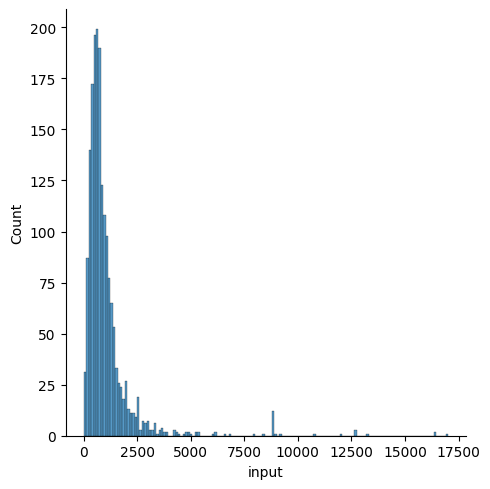

In [7]:
import seaborn as sns
length = df['input'].apply(len)
sns.displot(length)

In [8]:
from sklearn.model_selection import train_test_split

# 카테고리 전처리
prep_df = df[df['category']!='']#[:5000]
prep_df['category'] = prep_df['category'].apply(lambda x: 'Commonsense/logic' if x=="Common Sense / Logic" else x)
prep_df = prep_df.sort_values('category')

train_dataset, valid_dataset = train_test_split(prep_df, random_state=2022, test_size=0.2)


train = Dataset.from_pandas(train_dataset, preserve_index=False)
valid = Dataset.from_pandas(valid_dataset, preserve_index=False)
dataset = DatasetDict({'train':train, 'valid':valid})
dataset

DatasetDict({
    train: Dataset({
        features: ['category', 'instruction', 'input', 'output'],
        num_rows: 1458
    })
    valid: Dataset({
        features: ['category', 'instruction', 'input', 'output'],
        num_rows: 365
    })
})

In [9]:
import re
import emoji
from soynlp.normalizer import repeat_normalize

def clean(example): 
    pattern = re.compile(f'[^ .,?!/@$%~％·∼()\x00-\x7Fㄱ-ㅣ가-힣\[\]]+')
    url_pattern = re.compile(r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)')

    x_key = ['instruction', 'input', 'output']
    
    for key in x_key:
        x = example[key]
        # x = pattern.sub(' ', x)
        x = emoji.replace_emoji(x, replace='') #emoji 삭제
        x = url_pattern.sub('', x)
        x = x.strip()
        x = repeat_normalize(x, num_repeats=2)
        example[key] = x

    return example

dataset = dataset.map(clean)
dataset

DatasetDict({
    train: Dataset({
        features: ['category', 'instruction', 'input', 'output'],
        num_rows: 1458
    })
    valid: Dataset({
        features: ['category', 'instruction', 'input', 'output'],
        num_rows: 365
    })
})

In [10]:
prep_df.to_json('./prep_data.json', index=True, orient='records')

In [11]:
from nltk.tokenize import sent_tokenize

def preprocess_func(example):
    return tokenizer(example["output"], truncation=True, padding=False)

tokenized_datasets = dataset.map(preprocess_func, batched=True)
tokenized_datasets['train'] = tokenized_datasets['train'].rename_column("input_ids", "decoder_input_ids")
tokenized_datasets['train'] = tokenized_datasets['train'].rename_column('attention_mask', 'decoder_attention_mask')
tokenized_datasets['valid'] = tokenized_datasets['valid'].rename_column("input_ids", "decoder_input_ids")
tokenized_datasets['valid'] = tokenized_datasets['valid'].rename_column('attention_mask', 'decoder_attention_mask')


def preprocess_function(example):
    return tokenizer(f'{example["instruction"]}', truncation=True, padding=False, max_length=128)#, return_tensors='pt')
# return tokenizer(f'{example["instruction"]} {example["input"]}', truncation=True, padding=False, max_length=128)#, return_tensors='pt')

tokenized_datasets = tokenized_datasets.map(preprocess_function)
# tokenized_datasets['train'] = tokenized_datasets['train'].rename_column("input_ids", "encoder_input_ids")
# tokenized_datasets['train'] = tokenized_datasets['train'].rename_column('attention_mask', 'encoder_attention_mask')

tokenized_datasets.set_format("torch")
tokenized_datasets = tokenized_datasets.remove_columns(['category', 'instruction', 'input', 'output',])
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['decoder_input_ids', 'decoder_attention_mask', 'input_ids', 'attention_mask'],
        num_rows: 1458
    })
    valid: Dataset({
        features: ['decoder_input_ids', 'decoder_attention_mask', 'input_ids', 'attention_mask'],
        num_rows: 365
    })
})

In [12]:
from torch.utils.data import DataLoader
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
from torchmetrics.text.rouge import ROUGEScore


def validation(model, valid_dataloader):
    avg_rouge_score = []
    for data in valid_dataloader:
        data = data.to(device)
        # print(data)
        # print(data['input_ids'])
        # print(data['input_ids'].shape)
        # print(data['decoder_input_ids'].shape)
        
        output = model.generate(input_ids=data['input_ids'])#,labels=data['decoder_input_ids'])
        
        # question = tokenizer.decode(data['input_ids'][0], skip_special_tokens=True)
        pred = tokenizer.decode(output[0], skip_special_tokens=True)
        target = tokenizer.decode(data['decoder_input_ids'][0], skip_special_tokens=True)

        # print('Q:', question)
        # print('A:', pred)
        # print('GT:', target, '\n')
        # torch.cuda.empty_cache()
        
        rouge = ROUGEScore()
        rouge_score = rouge(pred, target)
        avg_rouge_score.append(rouge_score)
    return pd.DataFrame(avg_rouge_score).mean().to_dict()

In [ ]:
model_name = "google/flan-t5-base"
model = T5ForConditionalGeneration.from_pretrained(model_name, output_hidden_states=True).to(device)

In [18]:
from torch.utils.data import DataLoader
from tqdm import tqdm
import numpy as np
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
train_epoch = 5


train_dataloader = DataLoader(tokenized_datasets['train'], shuffle=False, batch_size=1, collate_fn=data_collator)
valid_dataloader = DataLoader(tokenized_datasets["valid"], shuffle=False, batch_size=1, collate_fn=data_collator)

import wandb

wandb.init(project='t5_sum',
           tags=['ori', model_name],
           )

wandb.watch(model)
for e in range(train_epoch):
    train_loss = []
    total, correct = 0, 0
    model.train()

    for data in tqdm(train_dataloader):
        data = data.to(device)

        text_output = model(input_ids=data['input_ids'], 
                            attention_mask=data['attention_mask'],
                            labels=data['decoder_input_ids'][:,:-1].contiguous()
                            )

        loss = text_output.loss
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        # print(loss)
        train_loss.append(loss.item())
        # torch.cuda.empty_cache()
        
    avg_loss = np.mean(train_loss)
    print(f'Epoch:{e}, Train_loss:{avg_loss}')
    
    valid_log = validation(model, valid_dataloader)
    wandb.log({'train_loss':avg_loss})
    wandb.log(valid_log)
    # print(loss)
    # print(logits)
    # print(tokenizer.decode(enc_inputs['input_ids'][0], skip_special_tokens=True))
    # print(tokenizer.decode(torch.argmax(text_output.logits, dim=2)[0], skip_special_tokens=True))
    
    
# for data in train_dataloader:
#     # print(data)
#     # print(data['input_ids'])
#     # print(data['input_ids'].shape)
#     # print(data['decoder_input_ids'].shape)
    
#     text_output = model.generate(input_ids=data['input_ids'])#,labels=data['decoder_input_ids'])
#     print('Q:', tokenizer.decode(data['input_ids'][0], skip_special_tokens=True))
#     print('A:', tokenizer.decode(text_output[0], skip_special_tokens=True), '\n')
wandb.finish()

100%|██████████| 1458/1458 [02:13<00:00, 10.94it/s]
/home/uj-user/Yo/dolly-15k-analysis/dolly-venv/lib/python3.8/site-packages/transformers/generation/utils.py:1353: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Epoch:0, Train_loss:2.4376293532911237


100%|██████████| 1458/1458 [02:13<00:00, 10.90it/s]
/home/uj-user/Yo/dolly-15k-analysis/dolly-venv/lib/python3.8/site-packages/transformers/generation/utils.py:1353: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Epoch:1, Train_loss:2.3510562855531862


100%|██████████| 1458/1458 [02:13<00:00, 10.91it/s]
/home/uj-user/Yo/dolly-15k-analysis/dolly-venv/lib/python3.8/site-packages/transformers/generation/utils.py:1353: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Epoch:2, Train_loss:2.2871687775567193


100%|██████████| 1458/1458 [02:13<00:00, 10.91it/s]
/home/uj-user/Yo/dolly-15k-analysis/dolly-venv/lib/python3.8/site-packages/transformers/generation/utils.py:1353: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Epoch:3, Train_loss:2.1943877681841326


100%|██████████| 1458/1458 [02:13<00:00, 10.94it/s]
/home/uj-user/Yo/dolly-15k-analysis/dolly-venv/lib/python3.8/site-packages/transformers/generation/utils.py:1353: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Epoch:4, Train_loss:2.1434728915845294


rouge1_fmeasure,▆█▃▂▁
rouge1_precision,█▆▄▁▁
rouge1_recall,▂█▄▁▂
rouge2_fmeasure,█▄▁▁▄
rouge2_precision,█▅▃▁▂
rouge2_recall,█▃▁▁▃
rougeL_fmeasure,█▇▅▃▁
rougeL_precision,█▅▅▂▁
rougeL_recall,▅█▄▂▁
rougeLsum_fmeasure,▇█▄▃▁
rougeLsum_precision,█▆▄▂▁


In [16]:
from torch.utils.data import DataLoader
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
from torchmetrics.text.rouge import ROUGEScore


avg_rouge_score = []

for data in valid_dataloader:
    data = data.to(device)
    # print(data)
    # print(data['input_ids'])
    # print(data['input_ids'].shape)
    # print(data['decoder_input_ids'].shape)
    
    output = model.generate(input_ids=data['input_ids'])#,labels=data['decoder_input_ids'])
    
    question = tokenizer.decode(data['input_ids'][0], skip_special_tokens=True)
    pred = tokenizer.decode(output[0], skip_special_tokens=True)
    target = tokenizer.decode(data['decoder_input_ids'][0], skip_special_tokens=True)

    print('Q:', question)
    print('A:', pred)
    print('GT:', target, '\n')
    # torch.cuda.empty_cache()
    
    rouge = ROUGEScore()
    rouge_score = rouge(pred, target)
    avg_rouge_score.append(rouge_score)
pd.DataFrame(avg_rouge_score).mean()

/home/uj-user/Yo/dolly-15k-analysis/dolly-venv/lib/python3.8/site-packages/transformers/generation/utils.py:1353: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Q: What was Jiang's previous position before becoming the president of China?
A: President of China from January 1st, 1921 to December 31, 2003. He was the
GT: He was the mayor of Shanghai and then became Communist Party secretary 

Q: When did Arsenal first reach the first division? How many league titles did they win between 1989 and 2005 and how many FA cups? How many trophies in total for that period?
A: Arsenal won four league titles between 1989 and 2005. Arsenal won eight FA Cups between 1989 and
GT: Arsenal reached the first division in 1904. Between 1989 and 2005, Arsenal won 5 league titles and 5 FA cups. That’s a total of 10 trophies. 

Q: Based on the following paragraph on the current use of obsidian, what's the difference between obsidian scalpels and steel scalpels?
A: Obsidian is the most common type of scalpel in the world. The difference
GT: Obsidian scalpels have a cutting edge that is many times sharper than a steel scalpel. In addition, obsidian scalpels have a smo

In [17]:
pd.DataFrame(avg_rouge_score).mean()

rouge1_fmeasure        0.284869
rouge1_precision       0.421463
rouge1_recall          0.275295
rouge2_fmeasure        0.141619
rouge2_precision       0.200955
rouge2_recall          0.134166
rougeL_fmeasure        0.251951
rougeL_precision       0.368674
rougeL_recall          0.247806
rougeLsum_fmeasure     0.263795
rougeLsum_precision    0.390845
rougeLsum_recall       0.257040
dtype: float64

In [ ]:

# from transformers import AutoTokenizer, T5ForConditionalGeneration

# tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-small")
# model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-small")

# training
input_ids = tokenizer("The <extra_id_0> walks in <extra_id_1> park", return_tensors="pt").input_ids
labels = tokenizer("<extra_id_0> cute dog <extra_id_1> the <extra_id_2>", return_tensors="pt").input_ids
outputs = model(input_ids=input_ids, labels=labels)
loss = outputs.loss
logits = outputs.logits

# inference
input_ids = tokenizer(
    "summarize: studies have shown that owning a dog is good for you", return_tensors="pt"
).input_ids  # Batch size 
print(input_ids)
print(input_ids.shape)
outputs = model.generate(input_ids=input_ids)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))
# studies have shown that owning a dog is good for you.

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument index in method wrapper_CUDA__index_select)

import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# GPT-2 모델과 토크나이저 초기화
model = GPT2LMHeadModel.from_pretrained('gpt2')
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# 학습 데이터 준비
train_text = ['Example sentence 1.', 'Example sentence 2.']
encoded_input = tokenizer(train_text, truncation=True, return_tensors='pt')
print(encoded_input)
print(*encoded_input)
print(*encoded_input)
# 모델에 입력 전달하여 출력 얻기
outputs = model(**encoded_input, labels=encoded_input['input_ids'])

# 손실 계산 및 역전파
loss = outputs.loss
loss.backward()

# 최적화를 위해 가중치 업데이트
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
optimizer.step()

In [ ]:
def train(model, train_loader, valid_loader, optimizer, scheduler):
    best_model = None
    best_acc = 0

    for epoch in range(1, CFG['EPOCHS']+1):
        train_loss = []
        total, correct = 0, 0
        model.train()
        
        for i, (x, y) in enumerate(tqdm(train_loader)):
            with accelerator.accumulate(model):
                x = x.to(device) 
                y = y.flatten().to(device)

                optimizer.zero_grad()
                output = model(x)
                loss = creterion(output, y)
                accelerator.backward(loss) #loss.backward()
                
                _, predicted = torch.max(output, 1)
                total += y.size(0)
                correct += predicted.eq(y).cpu().sum()
        
                if (i+1) % accumulation_step == 0:
                    optimizer.step()
                    optimizer.zero_grad()
                train_loss.append(loss.item())

        train_acc = correct / total
        avg_loss = np.mean(train_loss)
        valid_loss, valid_acc = validation(model, valid_loader, creterion)

        if scheduler is not None:
            scheduler.step(valid_acc)

        if valid_acc > best_acc:
            best_acc = valid_acc
            best_model = model
            accelerator.wait_for_everyone()
            unwrapped_model = accelerator.unwrap_model(model)
            os.makedirs(f"model", exist_ok=True)
            torch.save(unwrapped_model.state_dict(), f"model/{CFG['MODEL_NAME'].replace('/', '_')}_b{CFG['TOTAL_BATCH_SIZE']}_epoch{CFG['EPOCHS']}_lr{CFG['LR']}_e{epoch}_vl{valid_loss:.4f}va{valid_acc:.4f}.pth")

        accelerator.print(f'epoch:[{epoch}] train loss:[{avg_loss:.5f}] valid_loss:[{valid_loss:.5f}] trainacc:[{train_acc:.5f}] valid_acc:[{valid_acc:.5f}]')
        accelerator.log({'train_loss': avg_loss, 'valid_loss': valid_loss, 'train_acc:':train_acc, 'valid_acc': valid_acc}, step=epoch)
    accelerator.print(f'best_acc:{best_acc:.5f}')
    return best_model